In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:


def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums =[211002,210925,210918,210911,210911,210821,210814,210807,210731 ,210724,210717,210710]                                              
turnstiles_df = get_data(week_nums)



In [3]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188
...,...,...,...,...,...,...,...,...,...,...,...
209683,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,05:00:00,REGULAR,5554,585
209684,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:00:00,REGULAR,5554,585
209685,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:37:06,REGULAR,5554,585
209686,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,13:00:00,REGULAR,5554,585


In [4]:
import datetime

turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME,
                                            format="%m/%d/%Y %H:%M:%S")

In [5]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082,2021-09-25 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083,2021-09-25 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107,2021-09-25 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156,2021-09-25 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188,2021-09-25 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
209683,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,05:00:00,REGULAR,5554,585,2021-07-09 05:00:00
209684,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:00:00,REGULAR,5554,585,2021-07-09 09:00:00
209685,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:37:06,REGULAR,5554,585,2021-07-09 09:37:06
209686,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,13:00:00,REGULAR,5554,585,2021-07-09 13:00:00


In [6]:
turnstiles_df.to_csv('data.csv', index=False)

In [7]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///turnstiles.db")
df = pd.read_sql('SELECT * FROM data;', engine)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188


In [8]:
df.groupby(by='C/A')['UNIT' , 'STATION', 'DATE' , 'TIME' , 'ENTRIES' , 'EXITS'].min()

<ipython-input-8-ea1091a473d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by='C/A')['UNIT' , 'STATION', 'DATE' , 'TIME' , 'ENTRIES' , 'EXITS'].min()


,UNIT,STATION,DATE,TIME,ENTRIES,EXITS
C/A,,,,,,
A002,R051,59 ST,07/24/2021,00:00:00,0,0
A006,R079,5 AV/59 ST,07/24/2021,02:00:00,87551,34168
A007,R079,5 AV/59 ST,07/24/2021,02:00:00,3681,0
A010,R080,57 ST-7 AV,07/24/2021,00:00:00,2353483,667888
A011,R080,57 ST-7 AV,07/24/2021,00:00:00,0,0
...,...,...,...,...,...,...
S101,R070,ST. GEORGE,07/24/2021,00:00:00,6885,1
S101A,R070,ST. GEORGE,07/24/2021,00:00:00,794,0
S102,R165,TOMPKINSVILLE,07/24/2021,02:00:00,654,0


In [9]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082,2021-09-25 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083,2021-09-25 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107,2021-09-25 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156,2021-09-25 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188,2021-09-25 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
209683,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,05:00:00,REGULAR,5554,585,2021-07-09 05:00:00
209684,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:00:00,REGULAR,5554,585,2021-07-09 09:00:00
209685,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:37:06,REGULAR,5554,585,2021-07-09 09:37:06
209686,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,13:00:00,REGULAR,5554,585,2021-07-09 13:00:00


In [10]:
turnstiles_daily = (turnstiles_df
                         .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"],as_index=False)
                         .ENTRIES.first())

In [11]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,07/03/2021,00:00:00,7596401
1,A002,R051,02-00-00,59 ST,07/03/2021,04:00:00,7596412
2,A002,R051,02-00-00,59 ST,07/03/2021,08:00:00,7596422
3,A002,R051,02-00-00,59 ST,07/03/2021,12:00:00,7596466
4,A002,R051,02-00-00,59 ST,07/03/2021,16:00:00,7596572


In [12]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION","TIME"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-12-6e98fc76e160>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily


In [13]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,07/03/2021,00:00:00,7596401,NaN,NaN
1,A002,R051,02-00-00,59 ST,07/03/2021,04:00:00,7596412,NaN,NaN
2,A002,R051,02-00-00,59 ST,07/03/2021,08:00:00,7596422,NaN,NaN
3,A002,R051,02-00-00,59 ST,07/03/2021,12:00:00,7596466,NaN,NaN
4,A002,R051,02-00-00,59 ST,07/03/2021,16:00:00,7596572,NaN,NaN


In [14]:
turnstiles_daily ['daily_entries'] = turnstiles_daily['ENTRIES'] -  turnstiles_daily['PREV_ENTRIES']
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,daily_entries
0,A002,R051,02-00-00,59 ST,07/03/2021,00:00:00,7596401,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,07/03/2021,04:00:00,7596412,NaN,NaN,NaN
2,A002,R051,02-00-00,59 ST,07/03/2021,08:00:00,7596422,NaN,NaN,NaN
3,A002,R051,02-00-00,59 ST,07/03/2021,12:00:00,7596466,NaN,NaN,NaN
4,A002,R051,02-00-00,59 ST,07/03/2021,16:00:00,7596572,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2305887,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/01/2021,05:00:00,5554,09/30/2021,5554.0,0.0
2305888,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/01/2021,09:00:00,5554,09/30/2021,5554.0,0.0
2305889,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/01/2021,13:00:00,5554,09/30/2021,5554.0,0.0
2305890,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/01/2021,17:00:00,5554,09/30/2021,5554.0,0.0


In [15]:
import datetime

turnstiles_daily["DATE_TIME"] = pd.to_datetime(turnstiles_daily.DATE + " " + turnstiles_daily.TIME,
                                            format="%m/%d/%Y %H:%M:%S")

In [16]:
#This method Cleaning values = zero and values = null.
def get_daily_counts(row, max_counter):
    counter = abs(row["ENTRIES"] - row["PREV_ENTRIES"])
    if counter > max_counter:
        counter = row["ENTRIES"]
    return counter
turnstiles_daily['diff_'] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=40000)

In [17]:
turnstiles_daily = turnstiles_daily[~((turnstiles_daily['daily_entries']>0)
                   & (turnstiles_daily['daily_entries']!=turnstiles_daily['diff_']))]

In [18]:
turnstiles_daily.dropna(inplace=True)
turnstiles_daily

<ipython-input-18-c4ea2c050989>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstiles_daily.dropna(inplace=True)


,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,daily_entries,DATE_TIME,diff_
6,A002,R051,02-00-00,59 ST,07/04/2021,00:00:00,7596786,07/03/2021,7596401.0,385.0,2021-07-04 00:00:00,385.0
7,A002,R051,02-00-00,59 ST,07/04/2021,04:00:00,7596792,07/03/2021,7596412.0,380.0,2021-07-04 04:00:00,380.0
8,A002,R051,02-00-00,59 ST,07/04/2021,08:00:00,7596802,07/03/2021,7596422.0,380.0,2021-07-04 08:00:00,380.0
9,A002,R051,02-00-00,59 ST,07/04/2021,12:00:00,7596836,07/03/2021,7596466.0,370.0,2021-07-04 12:00:00,370.0
10,A002,R051,02-00-00,59 ST,07/04/2021,16:00:00,7596918,07/03/2021,7596572.0,346.0,2021-07-04 16:00:00,346.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2305887,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/01/2021,05:00:00,5554,09/30/2021,5554.0,0.0,2021-10-01 05:00:00,0.0
2305888,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/01/2021,09:00:00,5554,09/30/2021,5554.0,0.0,2021-10-01 09:00:00,0.0
2305889,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/01/2021,13:00:00,5554,09/30/2021,5554.0,0.0,2021-10-01 13:00:00,0.0
2305890,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/01/2021,17:00:00,5554,09/30/2021,5554.0,0.0,2021-10-01 17:00:00,0.0


In [19]:
turnstiles_daily['weekday']=pd.to_datetime(turnstiles_daily['DATE']).dt.weekday
turnstiles_daily['dayname']=pd.to_datetime(turnstiles_daily['DATE']).dt.day_name()

#Starday and Sunday is Weekends

<ipython-input-19-fa05a77139a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstiles_daily['weekday']=pd.to_datetime(turnstiles_daily['DATE']).dt.weekday
<ipython-input-19-fa05a77139a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstiles_daily['dayname']=pd.to_datetime(turnstiles_daily['DATE']).dt.day_name()


In [20]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,daily_entries,DATE_TIME,diff_,weekday,dayname
6,A002,R051,02-00-00,59 ST,07/04/2021,00:00:00,7596786,07/03/2021,7596401.0,385.0,2021-07-04 00:00:00,385.0,6,Sunday
7,A002,R051,02-00-00,59 ST,07/04/2021,04:00:00,7596792,07/03/2021,7596412.0,380.0,2021-07-04 04:00:00,380.0,6,Sunday
8,A002,R051,02-00-00,59 ST,07/04/2021,08:00:00,7596802,07/03/2021,7596422.0,380.0,2021-07-04 08:00:00,380.0,6,Sunday
9,A002,R051,02-00-00,59 ST,07/04/2021,12:00:00,7596836,07/03/2021,7596466.0,370.0,2021-07-04 12:00:00,370.0,6,Sunday
10,A002,R051,02-00-00,59 ST,07/04/2021,16:00:00,7596918,07/03/2021,7596572.0,346.0,2021-07-04 16:00:00,346.0,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305887,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/01/2021,05:00:00,5554,09/30/2021,5554.0,0.0,2021-10-01 05:00:00,0.0,4,Friday
2305888,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/01/2021,09:00:00,5554,09/30/2021,5554.0,0.0,2021-10-01 09:00:00,0.0,4,Friday
2305889,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/01/2021,13:00:00,5554,09/30/2021,5554.0,0.0,2021-10-01 13:00:00,0.0,4,Friday
2305890,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/01/2021,17:00:00,5554,09/30/2021,5554.0,0.0,2021-10-01 17:00:00,0.0,4,Friday


In [21]:
turnstiles_daily["Day_INTERVAL"] = (
    np.where( (turnstiles_daily.DATE_TIME.dt.weekday <= 4), "Weekdays"
         , "Weekends"
         ))

<ipython-input-21-3276cb24aa7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstiles_daily["Day_INTERVAL"] = (


In [22]:

turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,daily_entries,DATE_TIME,diff_,weekday,dayname,Day_INTERVAL
6,A002,R051,02-00-00,59 ST,07/04/2021,00:00:00,7596786,07/03/2021,7596401.0,385.0,2021-07-04 00:00:00,385.0,6,Sunday,Weekends
7,A002,R051,02-00-00,59 ST,07/04/2021,04:00:00,7596792,07/03/2021,7596412.0,380.0,2021-07-04 04:00:00,380.0,6,Sunday,Weekends
8,A002,R051,02-00-00,59 ST,07/04/2021,08:00:00,7596802,07/03/2021,7596422.0,380.0,2021-07-04 08:00:00,380.0,6,Sunday,Weekends
9,A002,R051,02-00-00,59 ST,07/04/2021,12:00:00,7596836,07/03/2021,7596466.0,370.0,2021-07-04 12:00:00,370.0,6,Sunday,Weekends
10,A002,R051,02-00-00,59 ST,07/04/2021,16:00:00,7596918,07/03/2021,7596572.0,346.0,2021-07-04 16:00:00,346.0,6,Sunday,Weekends
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305887,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/01/2021,05:00:00,5554,09/30/2021,5554.0,0.0,2021-10-01 05:00:00,0.0,4,Friday,Weekdays
2305888,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/01/2021,09:00:00,5554,09/30/2021,5554.0,0.0,2021-10-01 09:00:00,0.0,4,Friday,Weekdays
2305889,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/01/2021,13:00:00,5554,09/30/2021,5554.0,0.0,2021-10-01 13:00:00,0.0,4,Friday,Weekdays
2305890,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/01/2021,17:00:00,5554,09/30/2021,5554.0,0.0,2021-10-01 17:00:00,0.0,4,Friday,Weekdays


In [23]:
New_daily = turnstiles_daily.groupby([ "STATION","dayname","Day_INTERVAL"])[['diff_']]
New_daily.head(5)

,diff_
6,385.0
7,380.0
8,380.0
9,370.0
10,346.0
...,...
2303132,805.0
2303133,822.0
2303134,748.0
2303135,794.0


In [24]:
#higest stations Crowding based on entries(diff_)
new_diff = turnstiles_daily.groupby(["STATION" , 'Day_INTERVAL'])[['diff_' , 'dayname']].max()

In [25]:
top6crowded = new_diff.sort_values('diff_',ascending=False)
top6crowded

diff_    dayname
STATION        Day_INTERVAL                      
HUNTS POINT AV Weekends      3539769.0     Sunday
JUNCTION BLVD  Weekdays      1278639.0  Wednesday
ST. GEORGE     Weekdays      1216979.0  Wednesday
               Weekends      1215299.0     Sunday
JUNCTION BLVD  Weekends       796277.0     Sunday
...                                ...        ...
TOMPKINSVILLE  Weekdays          170.0  Wednesday
BEACH 98 ST    Weekdays          150.0  Wednesday
BROAD CHANNEL  Weekdays          108.0  Wednesday
ORCHARD BEACH  Weekends           61.0     Sunday
               Weekdays           42.0  Wednesday

[758 rows x 2 columns]

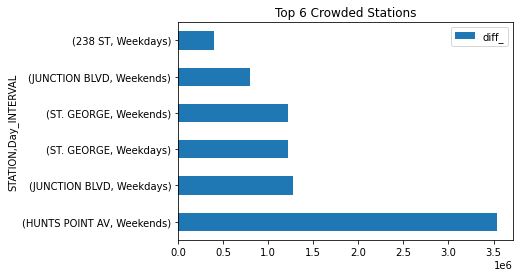

In [26]:
# top 6 busiest Stations
top6crowded.head(6).plot(kind='barh' ,title='Top 6 Crowded Stations' );


In [27]:
# Saperated Dataframe
dfWE = turnstiles_daily[turnstiles_daily['Day_INTERVAL'] == 'Weekends']
dfWD = turnstiles_daily[turnstiles_daily['Day_INTERVAL'] == 'Weekdays']


In [28]:
#Most crowded station on Weekends
top6WE = dfWE.groupby('STATION')[['diff_' , 'dayname','TIME']].max()
top6WEsorted = top6WE.sort_values( 'diff_',ascending=False)


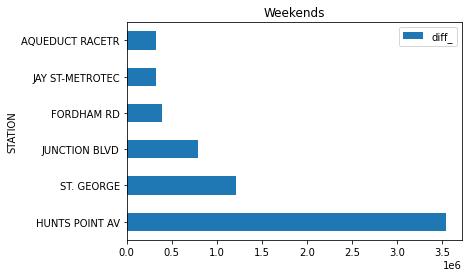

In [29]:
top6WEsorted.head(6).plot.barh()
plt.title("Weekends");

In [30]:
#total entry in station (HUNTS POINT AV)
#greater station in Weekend is HUNTS POINT AV
mask1=((turnstiles_daily.STATION == 'HUNTS POINT AV')&(turnstiles_daily.Day_INTERVAL== 'Weekends'))
S1=turnstiles_daily[mask1]
S1_HUNTS_POINT_AV =S1.groupby(['dayname','TIME'])[['diff_']].sum().sort_values( 'diff_',ascending=True)
S1_HUNTS_POINT_AV

diff_
dayname  TIME               
Sunday   21:00:00    17905.0
         17:00:00    18967.0
         13:00:00    20730.0
         09:00:00    22202.0
         05:00:00    24154.0
         01:00:00    24261.0
Saturday 21:00:00  3608813.0
         17:00:00  3612358.0
         13:00:00  3617922.0
         09:00:00  3621542.0
         05:00:00  3632912.0
         01:00:00  3633115.0

<AxesSubplot:title={'center':'The best time to do cleaning during the weekend( HUNTS POINT AV )'}, ylabel='dayname,TIME'>

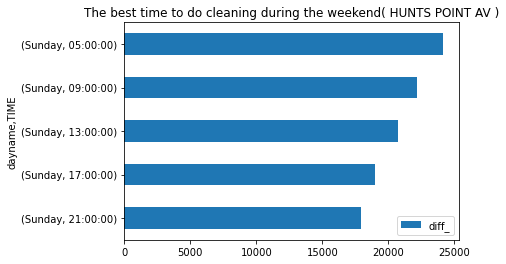

In [31]:
#the best time to do cleaning during the weekend. 
bestWE = S1_HUNTS_POINT_AV.sort_values('diff_', ascending=True).head(5)
bestWE.plot(kind='barh', title='The best time to do cleaning during the weekend( HUNTS POINT AV )')


In [32]:
#Top 6 crowded stations on Weekdays
top6WD = dfWD.groupby('STATION')[['diff_' , 'dayname','TIME']].max()
top6WDsorted = top6WD.sort_values('diff_',ascending=False)

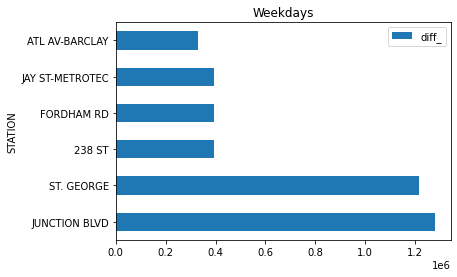

In [33]:
top6WDsorted.head(6).plot.barh()
plt.title("Weekdays");

In [34]:
#total entry in station (JUNCTION BLVD) , greater station in Weekdays is JUNCTION BLVD
#Monday is least day
mask2=((turnstiles_daily.STATION == 'JUNCTION BLVD')&(turnstiles_daily.Day_INTERVAL== 'Weekdays'))
S2=turnstiles_daily[mask2]
S2_JUNCTION_BLVD =S2.groupby(['dayname','TIME'])[['diff_']].sum().sort_values( 'diff_',ascending=True)
S2_JUNCTION_BLVD

diff_
dayname   TIME               
Monday    04:00:00    79316.0
          00:00:00    79584.0
          08:00:00   119679.0
          16:00:00   126843.0
          12:00:00   129062.0
Wednesday 12:00:00   130216.0
Monday    20:00:00   130444.0
Wednesday 20:00:00   130749.0
          16:00:00   130758.0
Thursday  00:00:00   130945.0
          04:00:00   130996.0
Friday    12:00:00   131189.0
Thursday  08:00:00   132238.0
Friday    16:00:00   132300.0
Thursday  12:00:00   132717.0
          16:00:00   132900.0
Friday    20:00:00   135614.0
Tuesday   08:00:00   137258.0
          04:00:00   137919.0
          00:00:00   138164.0
          12:00:00   139903.0
          16:00:00   140348.0
Wednesday 00:00:00   140682.0
Tuesday   20:00:00   140712.0
Wednesday 04:00:00   140748.0
          08:00:00   142336.0
Friday    08:00:00  2531588.0
          00:00:00  2531634.0
          04:00:00  2531690.0
Thursday  20:00:00  2531724.0

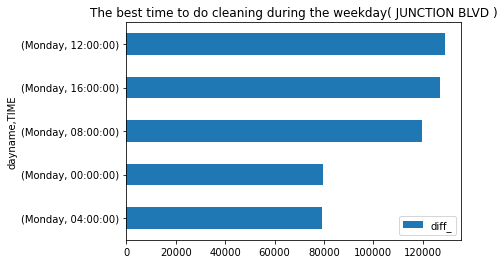

In [35]:
#the best time to do cleaning during the weekdays. 
bestWD = S2_JUNCTION_BLVD.sort_values('diff_', ascending=True).head(5)
bestWD.plot(kind='barh', title='The best time to do cleaning during the weekday( JUNCTION BLVD )');
